#  CNN개념이해_MNIST

* 본 파일은 GPU 런타임으로 연결됩니다.
* 경우에 따라서는 GPU 연결이 원할하지 않을 수도 있습니다.

## 1.환경준비

### (1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd

from sklearn.model_selection import train_test_split
from sklearn.metrics import *

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.backend import clear_session
from keras.optimizers import Adam
from keras.datasets import mnist, fashion_mnist

* 함수 만들기

In [2]:
# 학습곡선 함수
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err')
    plt.plot(history['val_loss'], label='val_err')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터로딩

![fashion class](https://user-images.githubusercontent.com/60168331/117663987-35e42e00-b1dc-11eb-88c7-64db3b4fbff0.png)

In [3]:
# 케라스 데이터셋으로 부터 fashion_mnist 불러오기
(x_train, y_train), (x_val, y_val) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 2 데이터 살펴보기

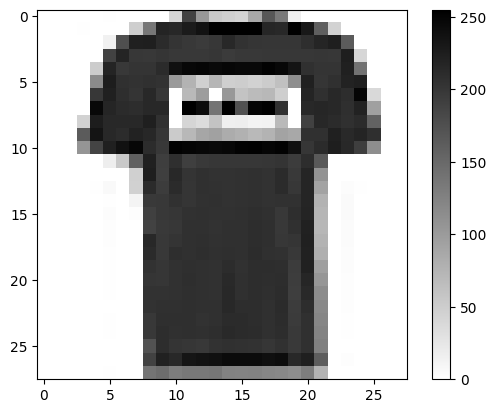

In [6]:
# 아래 숫자를 바꿔가며 화면에 그려 봅시다.
n = 1

plt.figure()
plt.imshow(x_train[n], cmap=plt.cm.binary)
plt.colorbar()
plt.show()

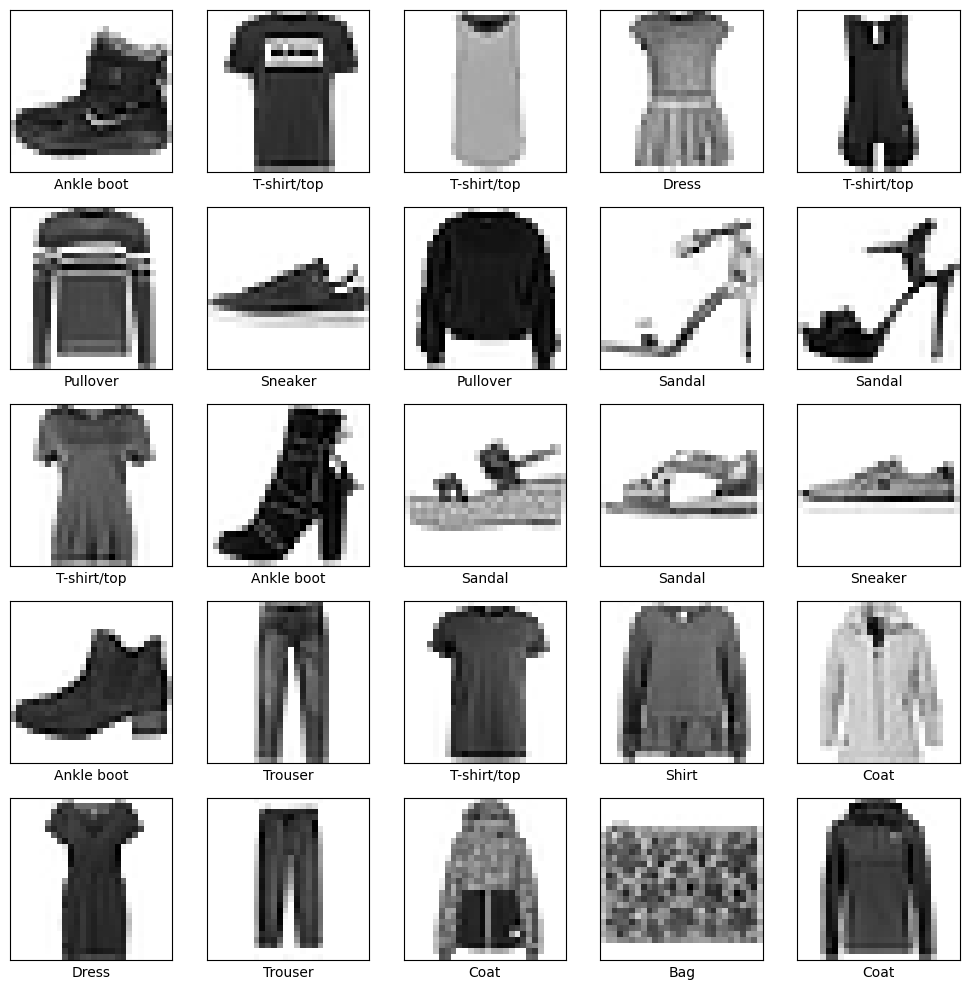

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.tight_layout()
plt.show()

## 3.데이터 준비

* CNN은 3차원 구조의 이미지(데이터셋은 4차원)를 입력해야 합니다.(input_shape)

In [8]:
x_train.shape, x_val.shape

((60000, 28, 28), (10000, 28, 28))

* reshape를 이용하여 다음과 같이 변환해 봅시다.
    * x_train.shape : (60000, 28, 28, 1)
    * x_val.shape : (10000, 28, 28, 1)

In [12]:
x_train = x_train.reshape(60000,28,28,1)
x_val = x_val.reshape(10000,28,28,1)

* Scaling : Min-Max
    * 0-255 값으로 되어 있는 데이터를 0-1사이 값으로 변환
    * x_train, x_val 그냥 255로 나누면 됨

In [13]:
x_train = x_train / 255.
x_val = x_val / 255.

## 4.CNN 모델링

* 아래 그림의 구조대로 모델을 설계하고 학습해 봅시다.
* learning_rate = 0.0001

![](https://github.com/DA4BAM/image/blob/main/cnn_mnist3.png?raw=true)

In [25]:
clear_session()

model = Sequential([ Conv2D( 32, kernel_size = (3, 3) , input_shape = (28 ,28,1), padding = 'same', strides = 1, activation = 'relu'),
                     MaxPooling2D(pool_size=(2,2) , strides = 2),
                     Conv2D(64, kernel_size = (3,3), padding = 'same', strides = 1, activation = 'relu'),
                     MaxPooling2D(pool_size = (2,2), strides = 2),
                     Flatten() ,
                     Dense(128, activation = 'relu'),
                     Dense(10, activation = 'softmax')  ])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               4

In [26]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy')

history = model.fit(x_train, y_train, epochs = 10,
                    validation_split=0.2).history

Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 1.3385 - val_loss: 0.8111
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.7646 - val_loss: 0.7100
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.6923 - val_loss: 0.6602
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.6465 - val_loss: 0.6182
Epoch 5/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.6142 - val_loss: 0.5908
Epoch 6/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5876 - val_loss: 0.5741
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5654 - val_loss: 0.5491
Epoch 8/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5447 - val_loss: 0.5444
Epoch 9/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.5259 - val_loss: 0.5213
Epoch 10/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.508

* 학습결과 그래프

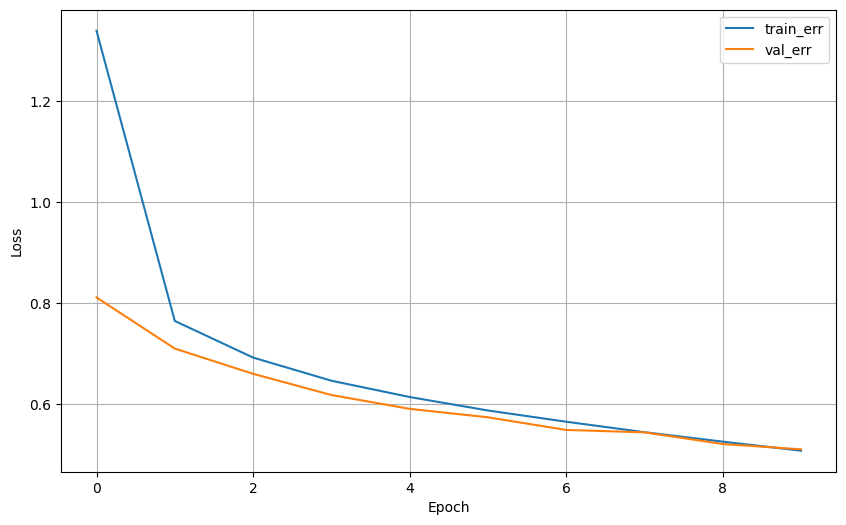

In [27]:
dl_history_plot(history)

* 예측 및 평가

In [28]:
pred = model.predict(x_val)

313/313 [==============================] - 1s 3ms/step


In [29]:
pred_1 = pred.argmax(axis=1)

In [30]:
print(accuracy_score(y_val,pred_1))
print('-'*60)
print(confusion_matrix(y_val, pred_1))
print('-'*60)
print(classification_report(y_val, pred_1))

0.5479
------------------------------------------------------------
[[714  89 112  15  16   0   5   0  49   0]
 [  0 957  32   7   1   0   0   0   3   0]
 [ 13  13 861   2  64   0   0   0  47   0]
 [ 23 620 153 151  34   0   0   0  19   0]
 [  0  34 714   1 233   0   0   0  18   0]
 [  1   2   0   0   0 894   0   7  50  46]
 [153  50 582  15 125   0   4   0  71   0]
 [  0   0   0   0   0 844   0 117  12  27]
 [  1   6  12   1   3   4   0   1 972   0]
 [  1   2   0   0   0 361   0   1  59 576]]
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.71      0.75      1000
           1       0.54      0.96      0.69      1000
           2       0.35      0.86      0.50      1000
           3       0.79      0.15      0.25      1000
           4       0.49      0.23      0.32      1000
           5       0.43      0.89      0.58      1000
           6       0.44      0.00      0.01      1000
       

## 5.틀린그림 찾아보기
위 모델의 결과에서 틀린 그림을 살펴 봅시다.

In [ ]:
idx = (y_val != pred_1)
x_val_wr = x_val[idx]
y_val_wr = y_val[idx]
pred_wr = pred_1[idx]

x_val_wr = x_val_wr.reshape(-1,28,28)
print(x_val_wr.shape)

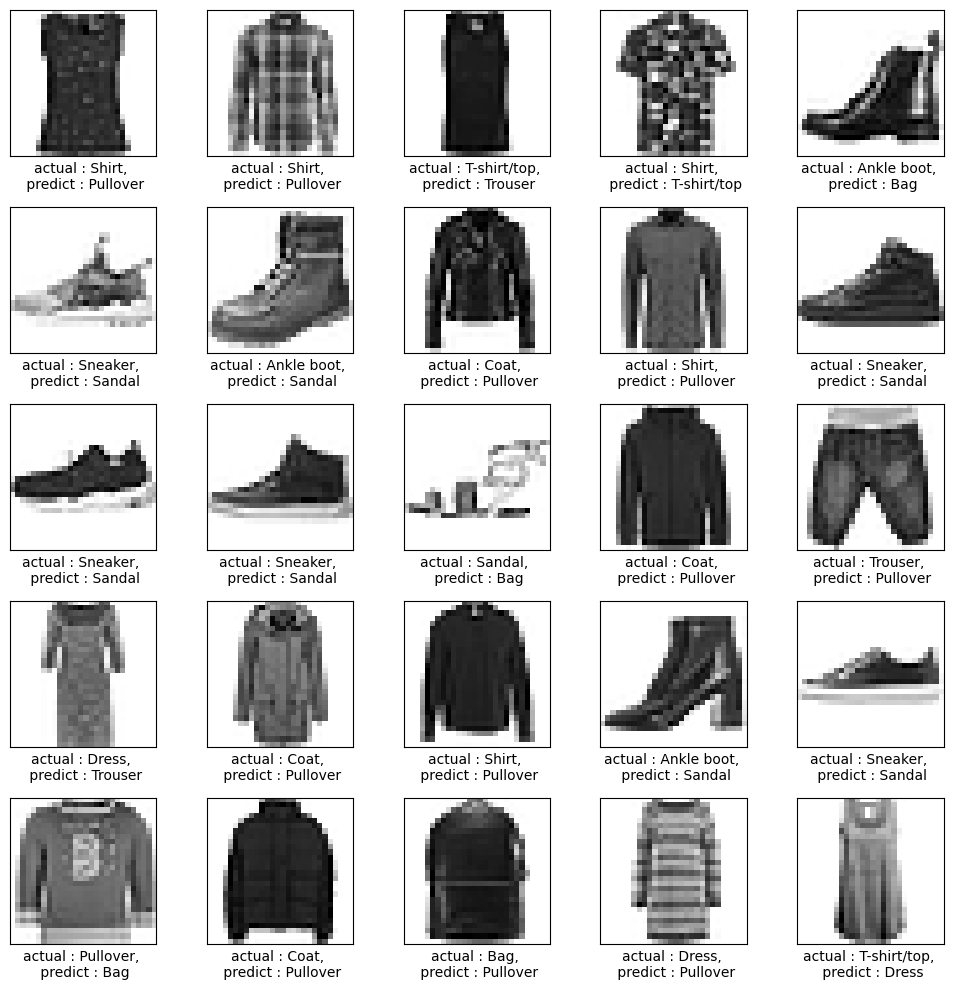

In [32]:
idx = rd.sample(range(x_val_wr.shape[0]),25)
x_temp = x_val_wr[idx]
y_temp = y_val_wr[idx]
p_temp = pred_wr[idx]

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_temp[i], cmap=plt.cm.binary)
    plt.xlabel(f'actual : {class_names[y_temp[i]]}, \n predict : {class_names[p_temp[i]]}')
plt.tight_layout()
plt.show()

## 6.모델 저장하기

* fmnist_model.h5 로 모델을 저장하고 파일로 다운 받아 놓겠습니다.

### (1) 모델 저장하기

In [33]:
model.save('fmnist_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### (2) 모델 로딩하기

In [34]:
from keras.models import load_model
model2 = load_model('fmnist_model.h5')

* 불러온 모델 사용하기

In [35]:
pred = model2.predict(x_val)

313/313 [==============================] - 1s 2ms/step


In [36]:
pred_1 = pred.argmax(axis=1)

In [37]:
print(accuracy_score(y_val,pred_1))
print('-'*60)
print(confusion_matrix(y_val, pred_1))
print('-'*60)
print(classification_report(y_val, pred_1))

0.5479
------------------------------------------------------------
[[714  89 112  15  16   0   5   0  49   0]
 [  0 957  32   7   1   0   0   0   3   0]
 [ 13  13 861   2  64   0   0   0  47   0]
 [ 23 620 153 151  34   0   0   0  19   0]
 [  0  34 714   1 233   0   0   0  18   0]
 [  1   2   0   0   0 894   0   7  50  46]
 [153  50 582  15 125   0   4   0  71   0]
 [  0   0   0   0   0 844   0 117  12  27]
 [  1   6  12   1   3   4   0   1 972   0]
 [  1   2   0   0   0 361   0   1  59 576]]
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.71      0.75      1000
           1       0.54      0.96      0.69      1000
           2       0.35      0.86      0.50      1000
           3       0.79      0.15      0.25      1000
           4       0.49      0.23      0.32      1000
           5       0.43      0.89      0.58      1000
           6       0.44      0.00      0.01      1000
       

## 7.손으로 그린 그림으로 예측해 봅시다.

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

* 그림판에서 손으로 그린 그림을 업로드 합니다.

In [ ]:
# 파일 열기
img = cv2.imread('f_t.png', cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)
print(img.shape)

In [ ]:
# 크기 조절하기
img = cv2.resize(255-img, (28, 28))
print(img.shape)
cv2_imshow(img)

In [ ]:
test_num = img.reshape(1,28,28,1)
pred = model.predict(test_num)
pred_1 = pred.argmax(axis=1)
print(class_names[pred_1[0]])